In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
bonds = screen_funds('Bonds', 'Domestic', 'Government', min_assets=.8)
equities = screen_funds('Equities', 'Domestic', 'Large-Cap', min_assets=.8)
print(len(bonds), len(equities))
quote = Quote(bonds + equities, 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

22 92
from 2019-05-20 to 2019-07-05 - 114


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0.2]
print(len(stats))
stats

113


,len,mean,std,shrp,drawdown
Symbols,,,,,
MBB,28,0.273622,0.231398,1.010983,0.325100
VMBS,28,0.263992,0.235977,0.950557,0.264901
IEF,28,0.562913,0.577077,0.906691,0.634695
VGIT,28,0.402010,0.431208,0.840263,0.500067
TLH,28,0.745615,0.845480,0.834949,0.896451
SCHR,28,0.400410,0.435551,0.828210,0.490910
IEI,28,0.356803,0.385396,0.822843,0.413588
GOVT,28,0.410531,0.455806,0.813610,0.502905
SPTL,28,0.939870,1.211279,0.743171,1.628163


evicted MBB 0.8831478786803574
evicted VTIP 0.7987766501770835
evicted SPTS 0.8873412989246201
evicted SPLV 0.802980089780528
evicted DVY 0.889647191427946
retry backlogs ['JHML', 'SPHQ', 'SCHP', 'PKW', 'RPG', 'FPX', 'NOBL', 'FTC', 'FV', 'JKE', 'SCHK', 'RPV', 'RSP', 'DTN', 'SUSA', 'ONEQ', 'FEX', 'SPTM', 'IWY', 'QUAL', 'VIG', 'USMV', 'SPLG', 'FTA', 'RDIV', 'DGRW', 'VOOV', 'VMBS', 'QQQ', 'VLUE', 'IPE', 'TIP', 'TDTT', 'STIP', 'QDF', 'LRGF', 'VONV', 'FTCS', 'FVD', 'SCHV', 'VYM', 'DGRO', 'DLN', 'XLG', 'VONG', 'SDY', 'HDV', 'VOOG', 'SCHX', 'IYY', 'VTI', 'PRF', 'SCHB', 'MGV', 'VTV', 'VGLT', 'IVV', 'TLT', 'IWB', 'VGSH', 'SPYG', 'IWV', 'MGC', 'IUSV', 'TLH', 'VONE', 'ITOT', 'SCHD', 'VV', 'SHY', 'IVW', 'SCHR', 'VGIT', 'VUG', 'SCHG', 'VOO', 'IEI', 'SPY', 'DHS', 'DSI', 'GOVT', 'PWV', 'FNDX', 'SCHO', 'IUSG', 'OEF', 'JKD', 'DIA', 'IWD', 'CFO', 'MTUM', 'EDV', 'GSLC', 'IVE', 'IWF', 'TILT', 'SDOG', 'MOAT', 'SPYD', 'SPTL', 'FDL', 'ADX', 'MGK', 'SPYV', 'RWL', 'USA'] at 0.905 - 1.896
evicted VMBS 0.8901325

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,28.0,0.814023,0.400601,-0.033074,0.668292,0.827774,1.069678,1.617994,1.932946,0.689090
TLH,28.0,0.745615,0.845480,-0.815692,0.145456,0.618397,1.130117,2.693552,0.834949,0.896451
CET,28.0,1.071485,1.766167,-2.372882,-0.257362,0.979289,2.261136,4.809933,0.584205,3.118643
VLUE,28.0,0.877220,2.317327,-3.985411,0.305653,1.467547,1.969697,4.888826,0.361424,6.135276


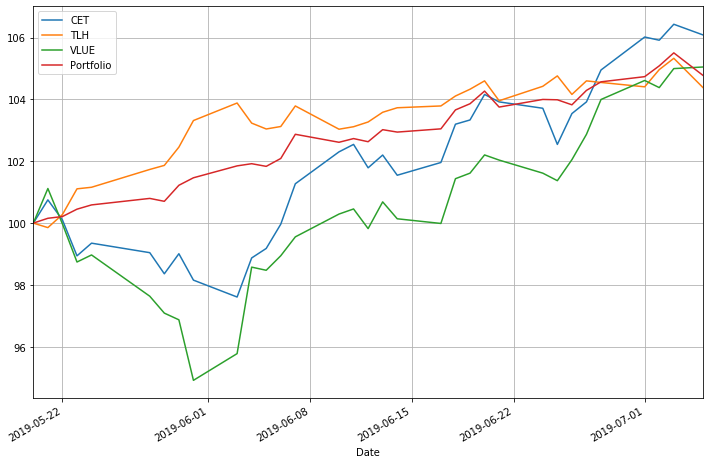

In [4]:
quote.setup_mask(stats.index)
ratio, shrp = quote.optimize_portfolio()
print(ratio, shrp)
quote.setup_mask(ratio)
quote.graph(ratio)

{'EDV': 0.577, 'MTUM': 0.423}


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,28.0,1.153422,0.874535,-0.801653,0.742260,1.259933,1.748492,2.871640,1.273521,1.378793
EDV,28.0,1.216500,1.715715,-2.141637,0.055889,0.708918,1.815445,5.231127,0.685905,2.610604
MTUM,28.0,1.099296,2.141910,-2.116999,-0.590523,1.159820,2.388106,6.048635,0.494705,2.638699


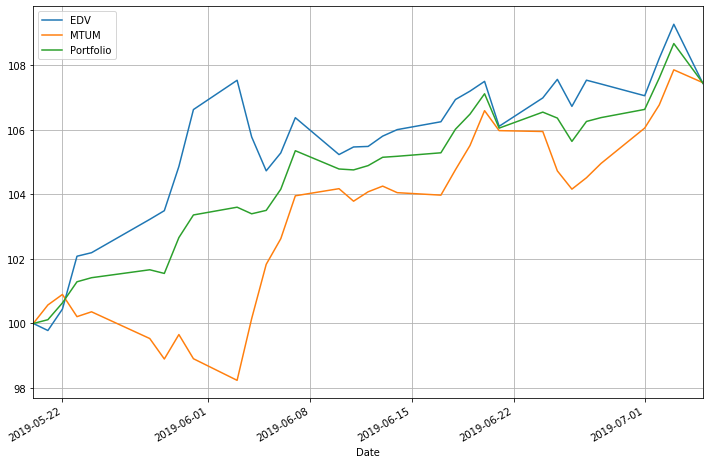

In [5]:
quote2 = Quote(['EDV', 'MTUM'], 50, 5)
ratio, *_ = quote2.find_optimal_ratio()
print(ratio)
quote2.graph(ratio)